# **week-1 Task-1**

## Business Objective

**Nova Financial Solutions** aims to enhance its predictive analytics capabilities to significantly boost its financial forecasting accuracy and operational efficiency through advanced data analysis. As a Data Analyst at Nova Financial Solutions,  my primary task is to conduct a rigorous analysis of the financial news dataset. The focus of your analysis should be two-fold:

*   **Sentiment Analysis:** Perform sentiment analysis on the ‘headline’ text to quantify the tone and sentiment expressed in financial news. This will involve using natural language processing (NLP) techniques to derive sentiment scores, which can be associated with the respective 'Stock Symbol' to understand the emotional context surrounding stock-related news.
*    **Correlation Analysis:** Establish statistical correlations between the sentiment derived from news articles and the corresponding stock price movements. This involves tracking stock price changes around the date the article was published and analyzing the impact of news sentiment on stock performance. This analysis should consider the publication date and potentially the time the article was published if such data can be inferred or is available.


## Dataset Overview

### Financial News and Stock Price Integration Dataset

**FNSPID (Financial News and Stock Price Integration Dataset)**, is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

- The structure of the [data] is as follows
    - `headline`: Article release headline, the title of the news article, which often includes key financial actions like stocks hitting highs, price target changes, or company earnings.
    - `url`: The direct link to the full news article.
    - `publisher`: Author/creator of article.
    - `date`: The publication date and time, including timezone information(UTC-4 timezone).
    - `stock`: Stock ticker symbol (unique series of letters assigned to a publicly traded company). For example (AAPL: Apple)

**import packages**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import textblob as tb
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

# Download VADER lexicon if not already present
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hill/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**data loading**

In [59]:
df=pd.read_csv('../data/raw/analyst_ratings.csv')

# **EDA**

Before we deep dive into the EDA we need to understand and inspect the data overview.

In [60]:
print("data shape:",df.shape)
print("data columns: \n",list(df.columns))
print("data types: \n",df.dtypes)
print("data info",df.shape)



data shape: (1407328, 6)
data columns: 
 ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
data types: 
 Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object
data info (1407328, 6)


**Data cleaning**

In [61]:

def clean_data(df):
    # Convert 'date' column to datetime
    clean_data= df.copy()
    if 'date' in clean_data.columns:
        df['date'] = pd.to_datetime(clean_data['date'], errors='coerce')
        print("Converted 'date' column to datetime.")
    else:
        print("'date' column not found.")

    null_values = clean_data.isnull().sum()
    print("null values in each column: \n", null_values[null_values > 0])

    #drop first column if it is unnamed
    if clean_data.columns[0].startswith('Unnamed'):
            clean_data = clean_data.drop(clean_data.columns[0], axis=1)
            print("First unnamed column dropped. New shape:", clean_data.shape)

    # Check for duplicates
    duplicates =clean_data.duplicated().sum()

    if duplicates > 0:
            print("number of duplicate rows:", duplicates)
            clean_data= clean_data.drop_duplicates()
            print("Duplicates removed. New shape:", clean_data.shape)
    else:
        print("No duplicates found.")
        clean_data = clean_data.dropna()
        print("Data after dropping null values. New shape:", clean_data.shape)
        
    return clean_data
    
clean_data= clean_data(df)
print("Cleaned data shape:", clean_data.shape)

# Save the cleaned data to a new CSV file
clean_data.to_csv('../data/processed/analyst_ratings_cleaned.csv')

Converted 'date' column to datetime.
null values in each column: 
 Series([], dtype: int64)
First unnamed column dropped. New shape: (1407328, 5)
number of duplicate rows: 1
Duplicates removed. New shape: (1407327, 5)
Cleaned data shape: (1407327, 5)


**Descriptive analysis**

In [62]:
cleaned_df= pd.read_csv('../data/processed/analyst_ratings_cleaned.csv')
if cleaned_df.columns[0].startswith('Unnamed'):
   clean_data = clean_data.drop(clean_data.columns[0], axis=1)
cleaned_df.describe()
           

,Unnamed: 0
count,1.407327e+06
mean,7.036636e+05
std,4.062609e+05
min,0.000000e+00
25%,3.518315e+05
50%,7.036640e+05
75%,1.055496e+06
max,1.407327e+06


In [63]:

number_of_publishers=len(cleaned_df['publisher'].unique())
number_of_articles=clean_data['url'].count()
articles_per_publisher=(number_of_articles/number_of_publishers)

print("Number of articles: ", number_of_articles)
print("Number of publishers: ", number_of_publishers)
print("Number of articles per publisher: ",round(articles_per_publisher))


Number of articles:  1407327
Number of publishers:  1034
Number of articles per publisher:  1361


**Time Series Analysis**

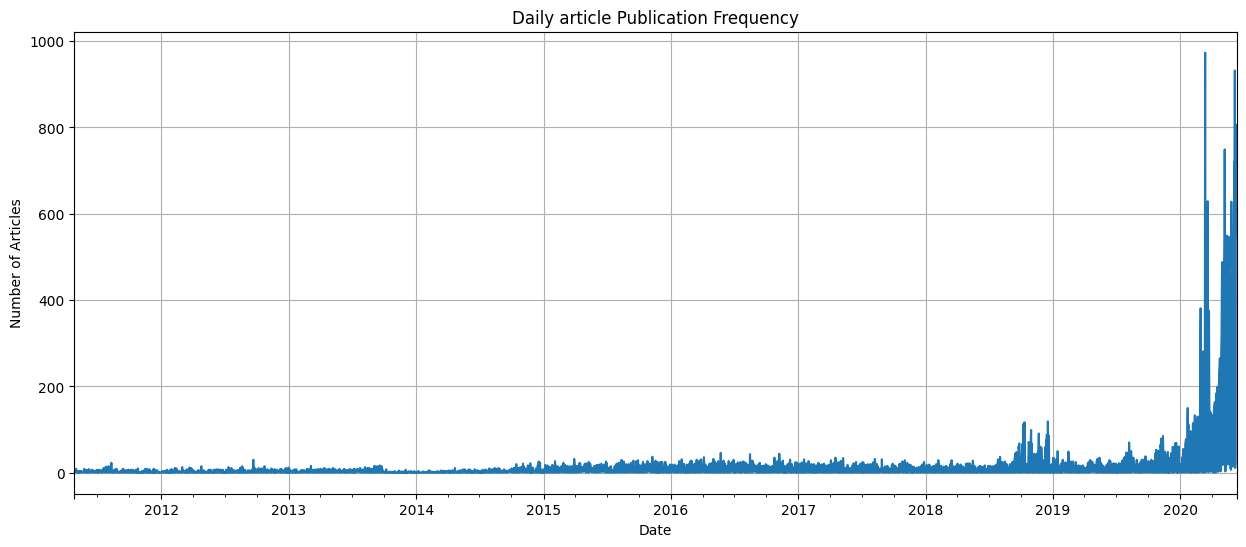

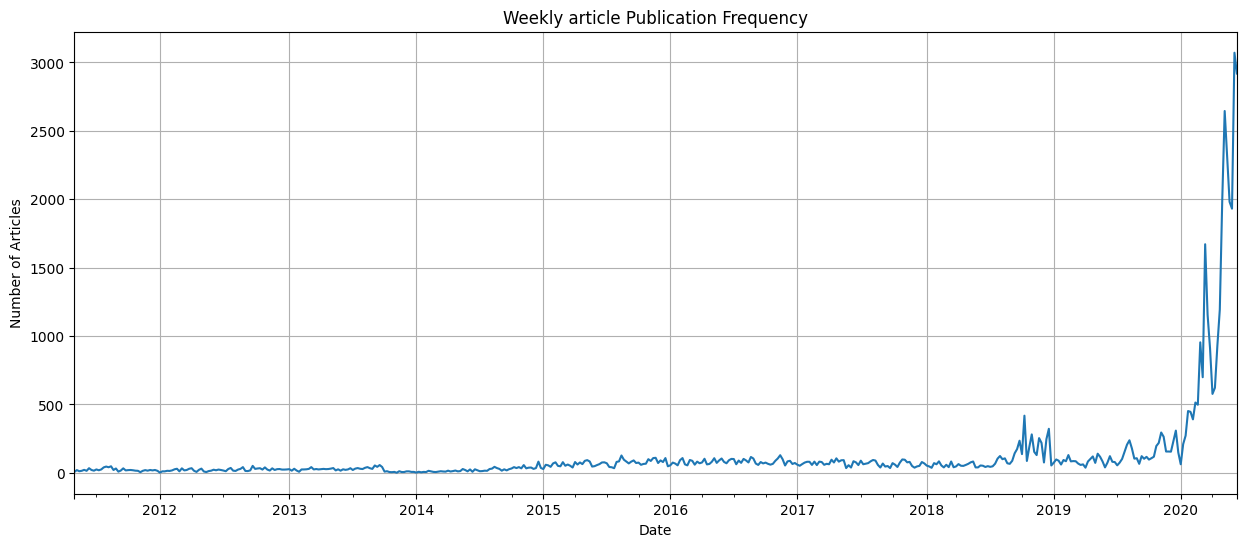

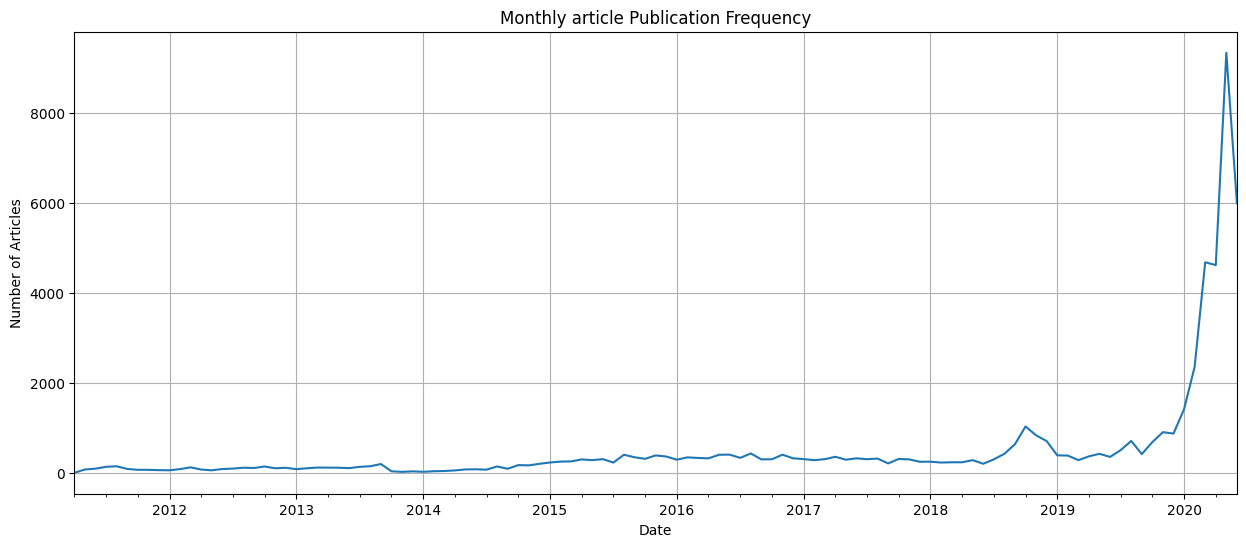

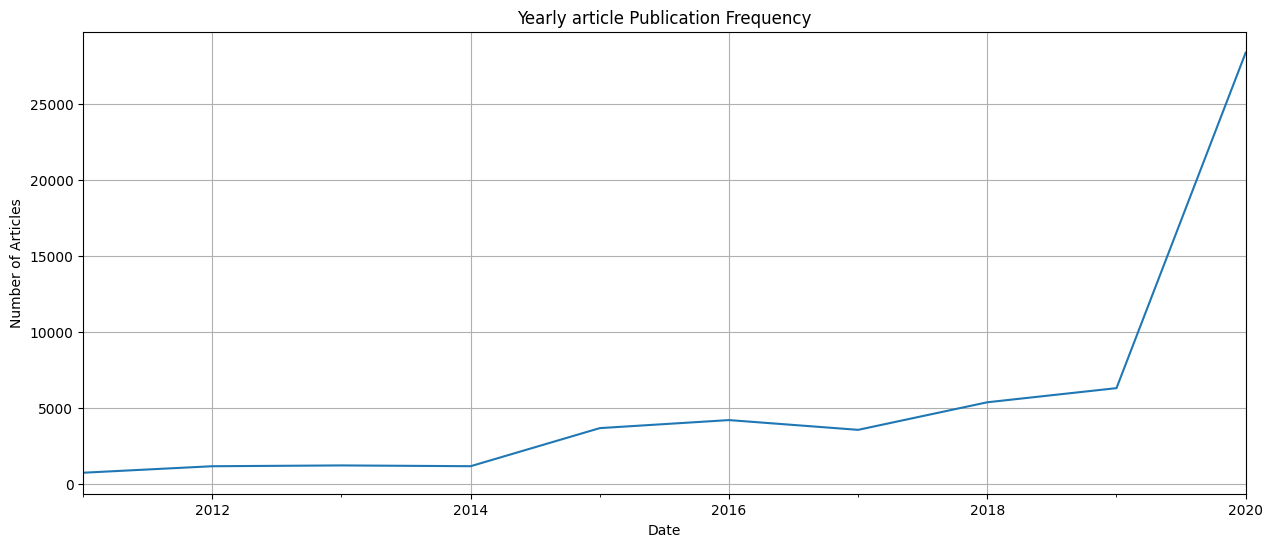

In [64]:
cleaned_df['date']=pd.to_datetime(cleaned_df['date'], errors='coerce')
cleaned_df=cleaned_df.set_index('date')
# Resample to daily frequency and count articles
daily_article_frequency = cleaned_df.resample('D').size()

# Resample to weekly frequency and count articles
weekly_article_frequency = cleaned_df.resample('W').size()
# Resample to monthly frequency and count articles
monthly_article_frequency = cleaned_df.resample('M').size()
# Resample to yearly frequency and count articles
yearly_article_frequency = cleaned_df.resample('Y').size()

#ploting the daily article frequency
plt.figure(figsize=(15, 6))
daily_article_frequency.plot(title='Daily article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

#ploting the weekly article frequency
plt.figure(figsize=(15, 6))
weekly_article_frequency.plot(title='Weekly article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()
#ploting the monthly article frequency
plt.figure(figsize=(15, 6))
monthly_article_frequency.plot(title='Monthly article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()
#ploting the yearly article frequency
plt.figure(figsize=(15, 6))
yearly_article_frequency.plot(title='Yearly article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()





 **Sentiment analysis**

In [ ]:
analyzer =  SIA()
def get_sentiment(text):
    if pd.isnull(text):
        return None
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

cleaned_df['sentiment'] = cleaned_df['headline'].apply(get_sentiment)
# Plot histogram of sentiment scores
plt.figure(figsize=(10, 6))
sn.histplot(cleaned_df['sentiment'], bins=30, color='blue', kde=True)  
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.show()


**publisher analysis**

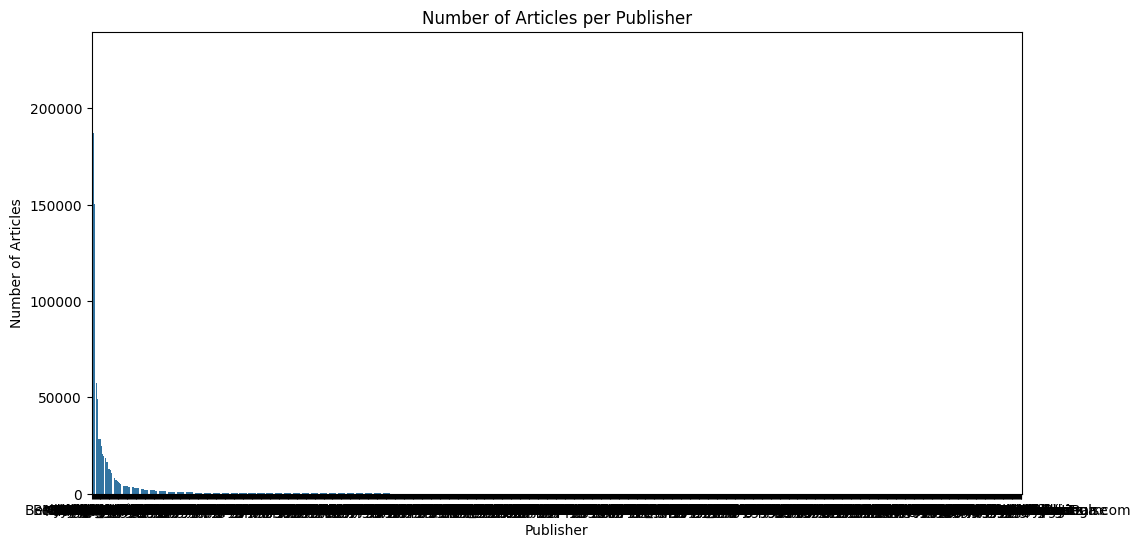

In [ ]:
publisher_counts=clean_data['publisher'].value_counts()
# Plotting the number of articles per publisher
plt.figure(figsize=(12, 6))
sn.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()